In [1]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import torch

project_root = Path.cwd()
if project_root.name == 'visualize':
    project_root = project_root.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Clear Jupyter's argv to avoid argparse conflicts
if hasattr(sys, 'argv'):
    original_argv = sys.argv.copy()
    sys.argv = [sys.argv[0]]

from datawrapper.datawrapper import LoaderConfig, get_data_wrapper_loader
from params import GeneralConfig

# Restore original argv
if 'original_argv' in locals():
    sys.argv = original_argv


In [2]:
cfg = GeneralConfig()
cfg.debugmode = True
cfg.train_batch = 1
cfg.num_workers = 1

loader_cfg = LoaderConfig(
    batch=cfg.train_batch,
    num_workers=cfg.num_workers,
    shuffle=False,
    debug_mode=cfg.debugmode,
    acs_num=cfg.acs_num,
    parallel_factor=cfg.parallel_factor,
    data_type=cfg.data_type,
    subject_num=cfg.subject_num,
    train_percent=cfg.train_percent,
    slice_per_subject=cfg.slice_per_subject,
)


In [3]:
# random sample i
i = torch.randint(0, 100, (1,)).item()
print(f"Sample index: {i}")

Sample index: 78


In [4]:
train_loader, train_dataset, train_len = get_data_wrapper_loader(
    # file_path=cfg.train_dataset,
    file_path = ["/fast_storage/intern/data/instruction_tuning/brats_crossmodal_mat/test"],
    training_mode=True,
    loader_cfg=loader_cfg,
    split="train",
)
print(f"Loaded {train_len} samples from {cfg.train_dataset}")


batch = list(train_loader)[i]
i+=1
inputs, targets, text_tokens, instruction_tokens = batch


DataWrapper initialized with 1000 samples.
Working directory: ['/fast_storage/intern/data/instruction_tuning/brats_crossmodal_mat/test']
Loaded 1000 samples from ['/fast_storage/intern/data/instruction_tuning/brats_crossmodal_mat/train', '/fast_storage/intern/data/instruction_tuning/brats_segmentation_mat/train', '/fast_storage/intern/data/instruction_tuning/fastmri_acceleration_mat/train', '/fast_storage/intern/data/instruction_tuning/oasis3_longitudinal_mat/train']


In [5]:
torch.set_printoptions(precision=4, sci_mode=False)

print("inputs tensor (shape, dtype):", inputs.shape, inputs.dtype)
print(inputs[0].cpu())

print("\n targets tensor (shape, dtype):", targets.shape, targets.dtype)
print(targets[0].cpu())

print("\n text_tokens tensor (shape, dtype):", text_tokens.shape, text_tokens.dtype)
print(text_tokens[0].cpu())

print("\n instruction_tokens tensor (shape, dtype):", instruction_tokens.shape, instruction_tokens.dtype)
print(instruction_tokens[0].cpu())


inputs tensor (shape, dtype): torch.Size([1, 1, 512, 512]) torch.float32
tensor([[[-2.3775, -2.3775, -2.3775,  ..., -2.3775, -2.3775, -2.3775],
         [-2.3775, -2.3775, -2.3775,  ..., -2.3775, -2.3775, -2.3775],
         [-2.3775, -2.3775, -2.3775,  ..., -2.3775, -2.3775, -2.3775],
         ...,
         [-2.3775, -2.3775, -2.3775,  ..., -2.3775, -2.3775, -2.3775],
         [-2.3775, -2.3775, -2.3775,  ..., -2.3775, -2.3775, -2.3775],
         [-2.3775, -2.3775, -2.3775,  ..., -2.3775, -2.3775, -2.3775]]])

 targets tensor (shape, dtype): torch.Size([1, 1, 512, 512]) torch.float32
tensor([[[-3.8499, -3.8499, -3.8499,  ..., -3.8499, -3.8499, -3.8499],
         [-3.8499, -3.8499, -3.8499,  ..., -3.8499, -3.8499, -3.8499],
         [-3.8499, -3.8499, -3.8499,  ..., -3.8499, -3.8499, -3.8499],
         ...,
         [-3.8499, -3.8499, -3.8499,  ..., -3.8499, -3.8499, -3.8499],
         [-3.8499, -3.8499, -3.8499,  ..., -3.8499, -3.8499, -3.8499],
         [-3.8499, -3.8499, -3.8499,  ..

In [6]:
print("Input mean, std, min, max: ")
input = inputs[0,0].cpu().numpy()
print(input.mean(), input.std(), input.min(), input.max())

print("Target mean, std, min, max: ")
out = targets[0,0].cpu().numpy()
print(out.mean(), out.std(), out.min(), out.max())

Input mean, std, min, max: 
-1.8972496 0.9554695 -2.3774588 4.634123
Target mean, std, min, max: 
-2.9792783 1.6990458 -3.8498812 3.4157119


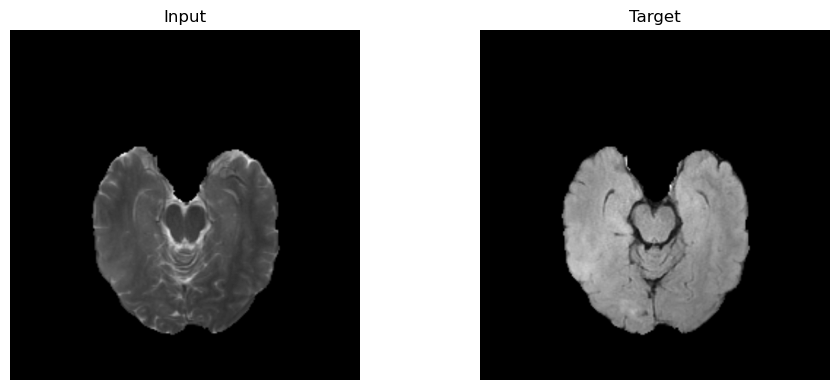

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(inputs[0, 0].cpu(), cmap="gray")
axes[0].set_title("Input")
axes[0].axis("off")

axes[1].imshow(targets[0, 0].cpu(), cmap="gray")
axes[1].set_title("Target")
axes[1].axis("off")

plt.tight_layout()
